# GRIP : The Sparks Foundation
Data Science and Business Analytics Intern

#  Topic :- Exploratory Data Analysis (EDA) - Terrorism
# Harshal Shivaji Holam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv(r"E:\Letsgrowmore\terrorism\globalterrorismdb_0718dist.csv")

In [3]:
df.head()        #first 5 rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.tail()     #last 5 rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
df.columns.values      #all columns

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [7]:
df=df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [8]:
df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
df.shape

(181691, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [11]:
df.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [12]:
df.corr()

,Year,Month,day,latitude,longitude,kill,Wound
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
kill,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wound,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


In [13]:
df.isna().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [14]:
df['Wound']=df['Wound'].fillna(0)
df['kill']=df['kill'].fillna(0)

In [15]:
df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [16]:
df['total_harm']=df['kill']+df['Wound']

In [17]:
df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive,total_harm
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        181691 non-null  float64
 11  Wound       181691 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
 18  total_harm  181691 non-null  float64
dtypes:

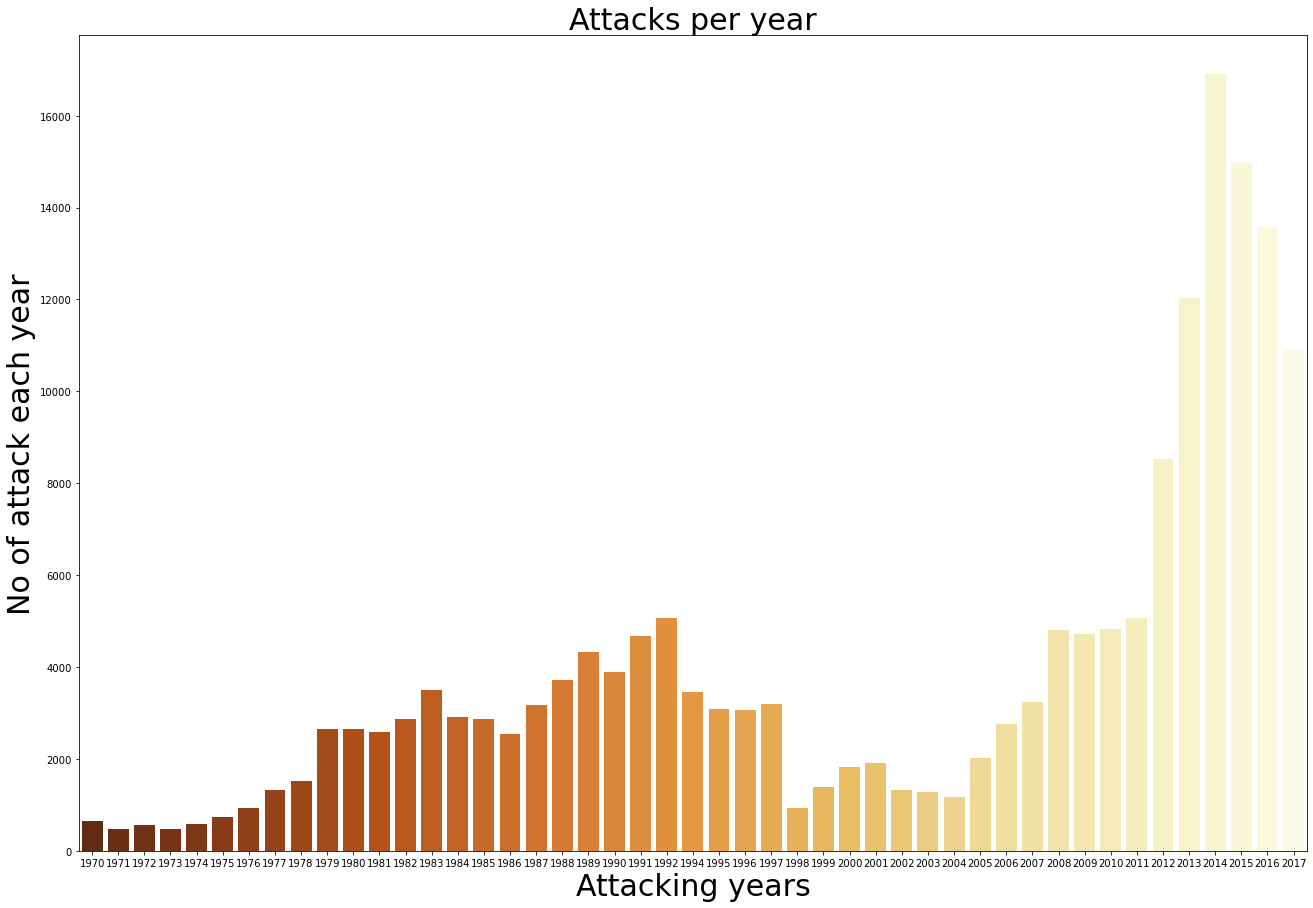

In [19]:
plt.figure(figsize=(22,15))
years = df['Year'].unique()
count_of_each_years = df['Year'].value_counts(dropna=False).sort_index()
sns.barplot(x=years,y=count_of_each_years,palette = "YlOrBr_r")
plt.xlabel("Attacking years",fontsize=30)
plt.ylabel("No of attack each year",fontsize=30)
plt.title("Attacks per year",fontsize=30)
plt.show()

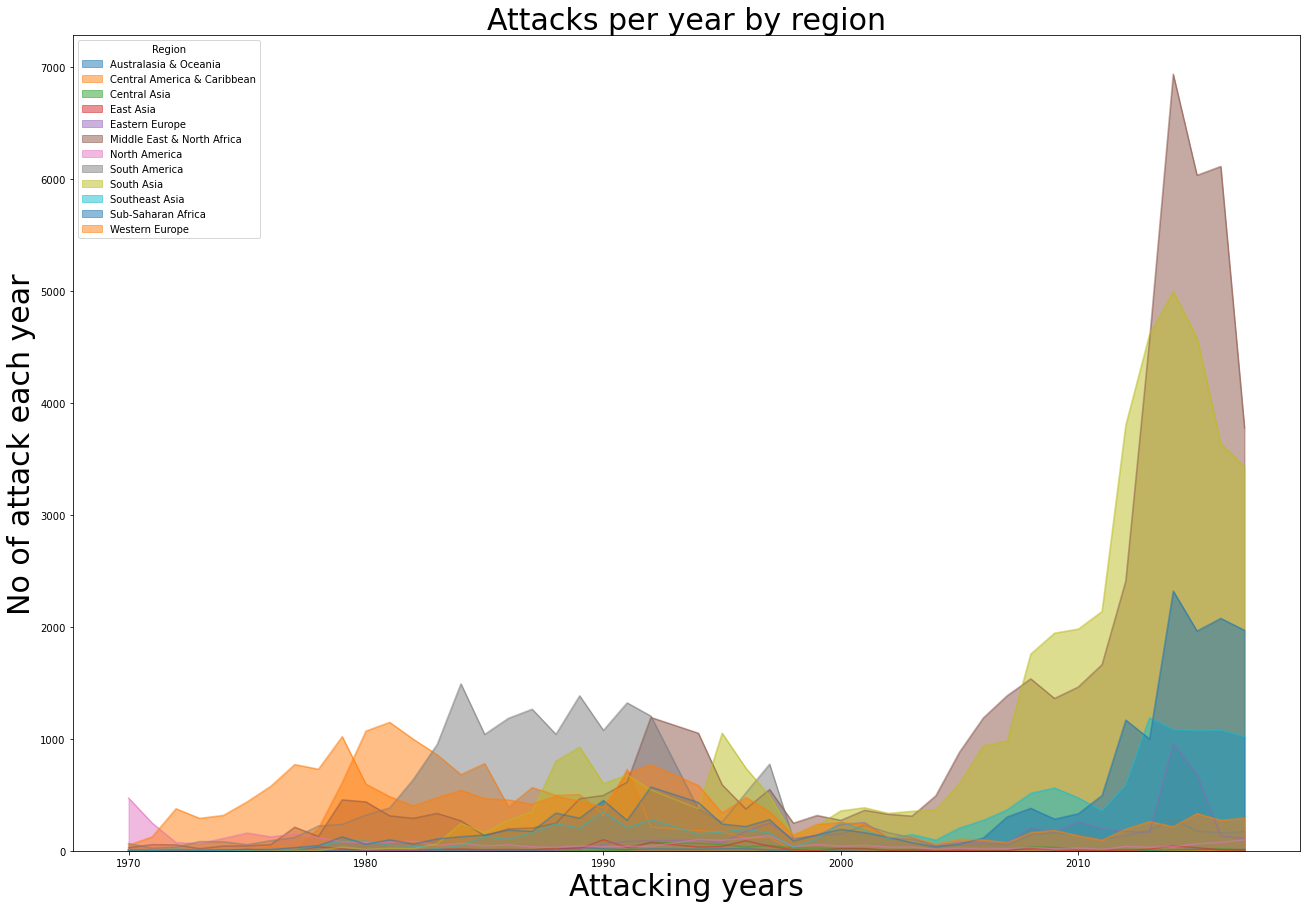

In [20]:
pd.crosstab(df.Year,df.Region).plot(kind='area',stacked=False,figsize=(22,15))
plt.xlabel("Attacking years",fontsize=30)
plt.ylabel("No of attack each year",fontsize=30)
plt.title("Attacks per year by region",fontsize=30)
plt.show()

In [21]:
Attack = df.Country.value_counts()[:5]
Attack

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

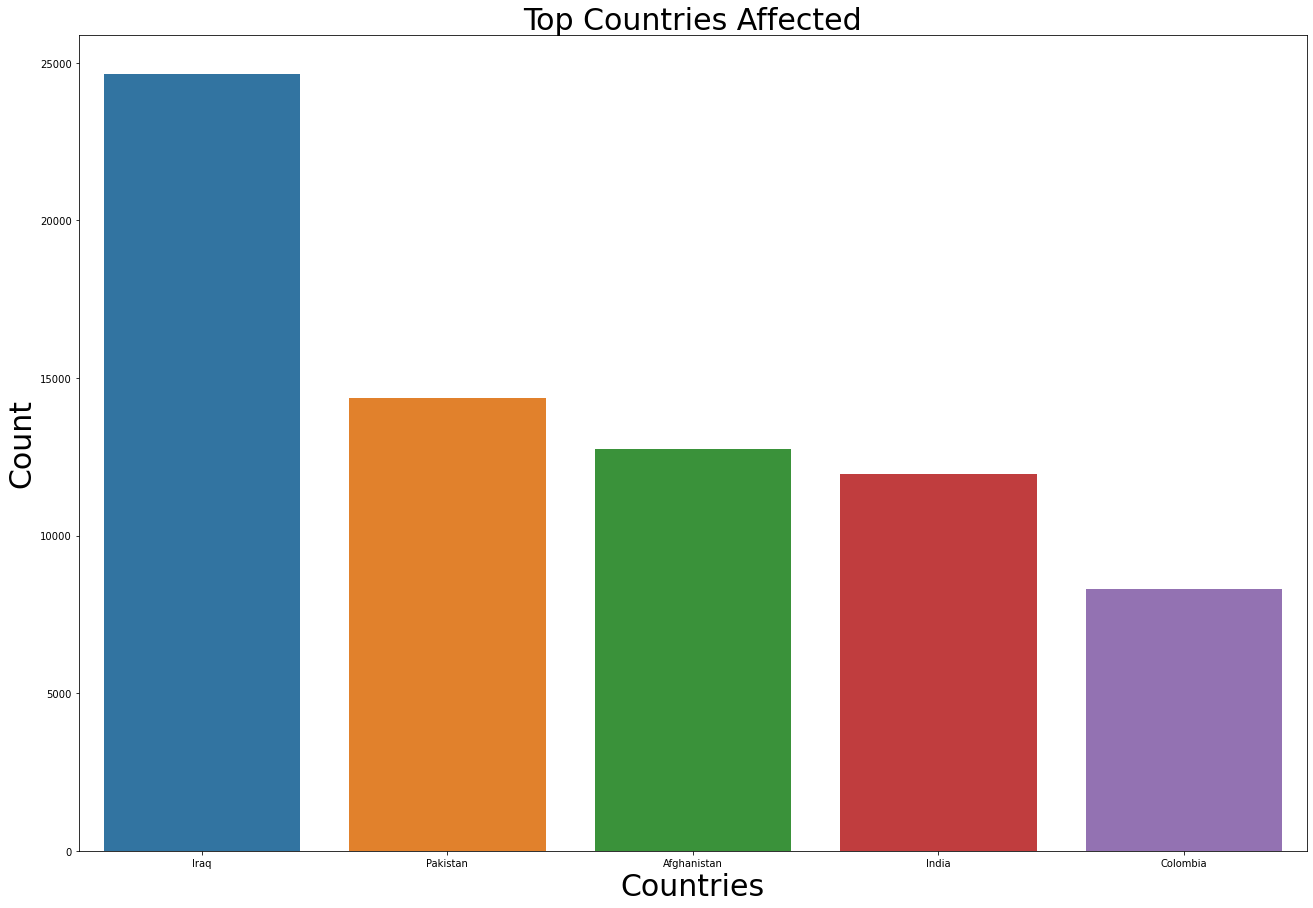

In [22]:
plt.figure(figsize=(22,15))
sns.barplot(df.Country.value_counts()[:5].index,df.Country.value_counts()[:5].values)
plt.title('Top Countries Affected',fontsize=30)
plt.xlabel('Countries',fontsize=30)
plt.ylabel('Count',fontsize=30)

plt.show()

Text(0.5, 0, 'Year')

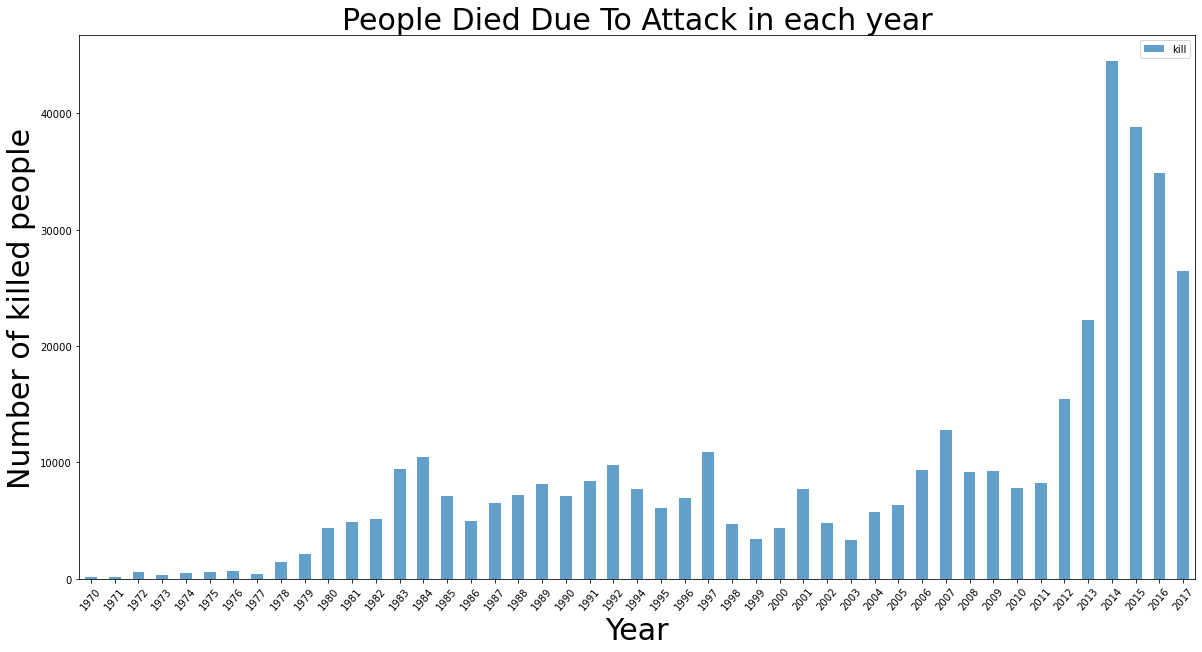

In [23]:
graph = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
graph.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack in each year",fontsize=30)
plt.ylabel("Number of killed people",fontsize=30)
plt.xlabel('Year',fontsize=30)

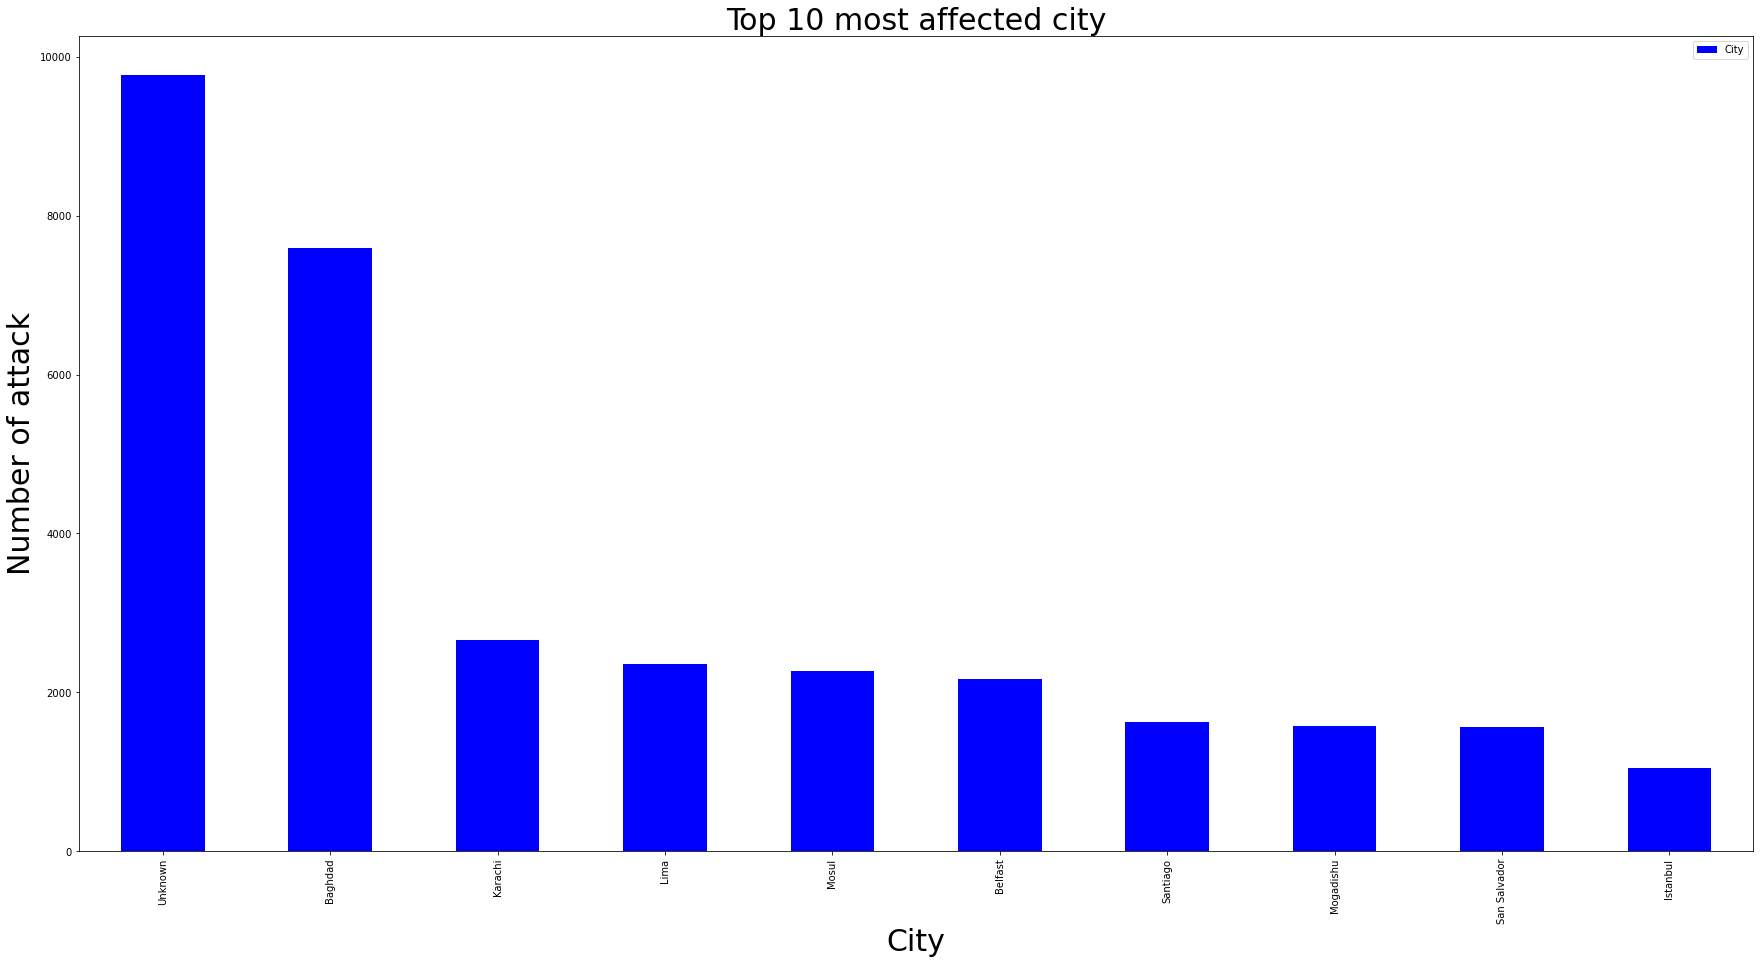

In [24]:
df['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(30,15),color='blue')
plt.xlabel("City",fontsize=30)
plt.ylabel("Number of attack",fontsize=30)
plt.title("Top 10 most affected city",fontsize=30)
plt.show()


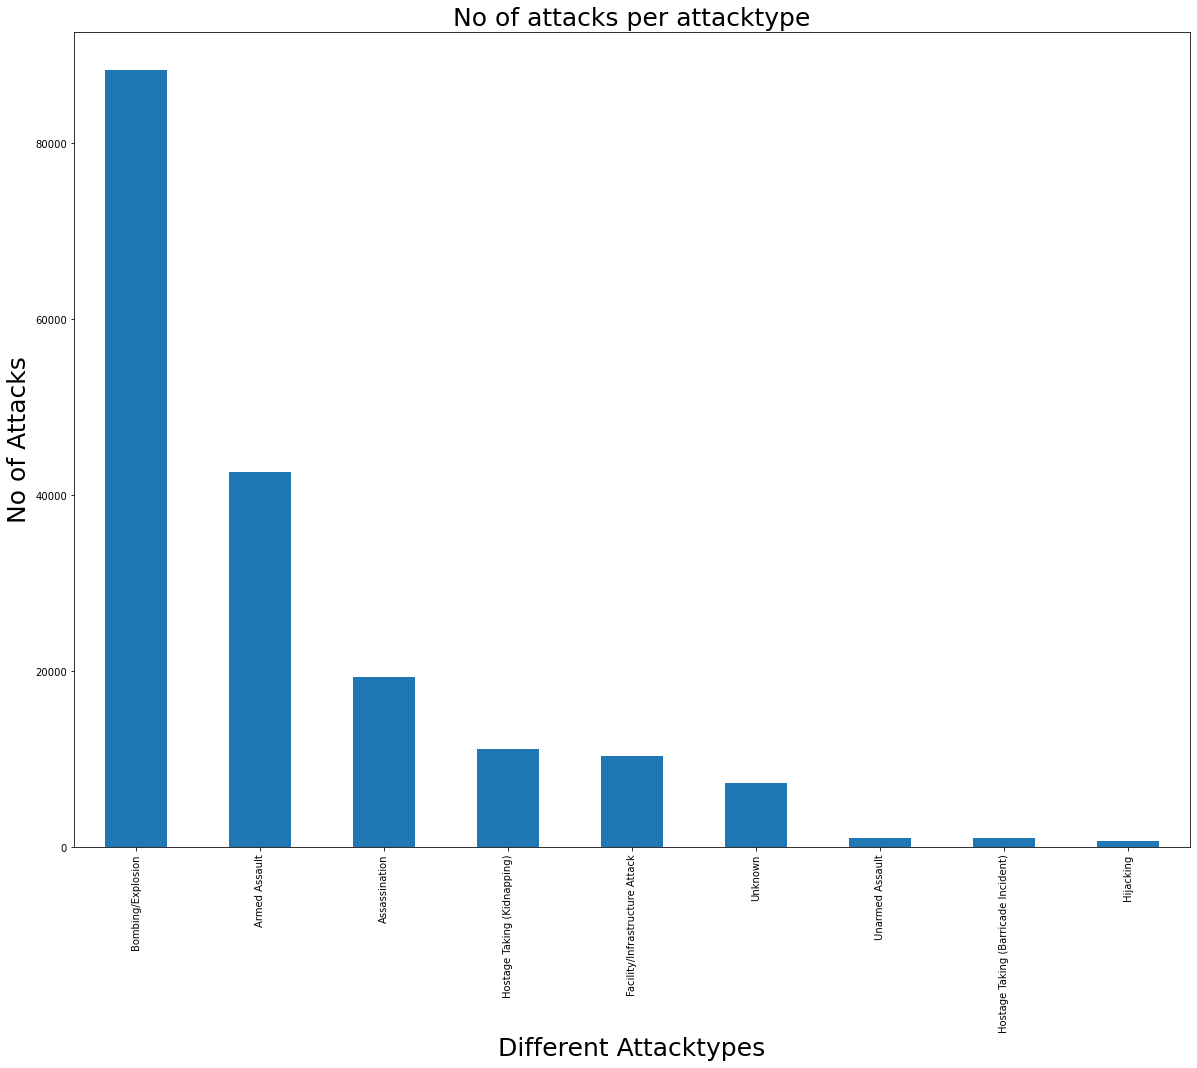

In [25]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(20,15))
plt.xlabel("Different Attacktypes",fontsize=25)
plt.ylabel("No of Attacks",fontsize=25)
plt.title("No of attacks per attacktype",fontsize=25)
plt.show()

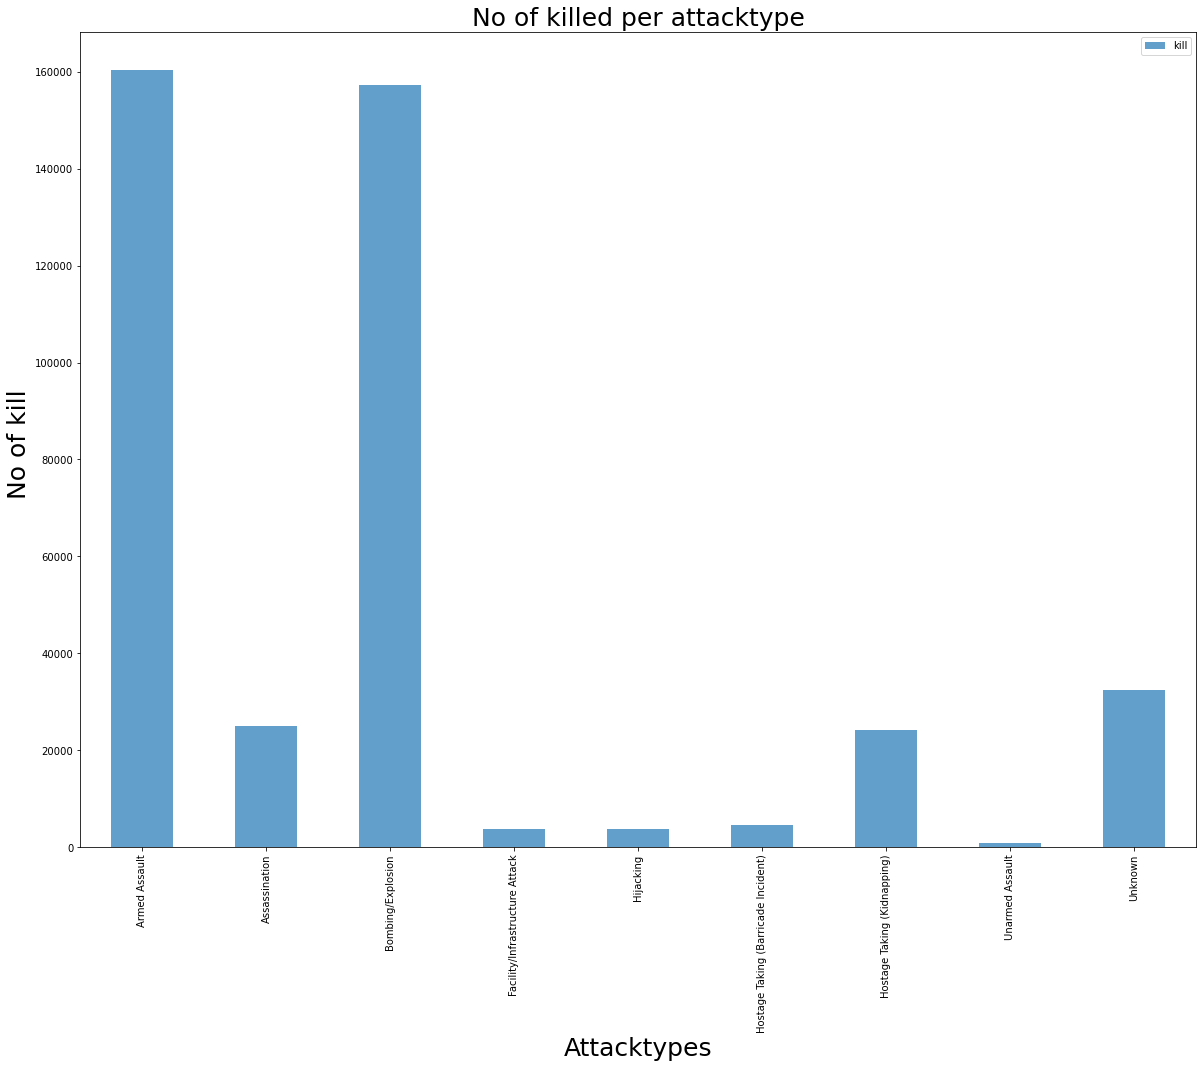

In [26]:
graph=df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
graph.plot(kind='bar',alpha=0.7,ax=ax4,figsize=(20,15))
plt.xlabel("Attacktypes",fontsize=25)
plt.ylabel("No of kill ",fontsize=25)
plt.title("No of killed per attacktype",fontsize=25)
plt.show()

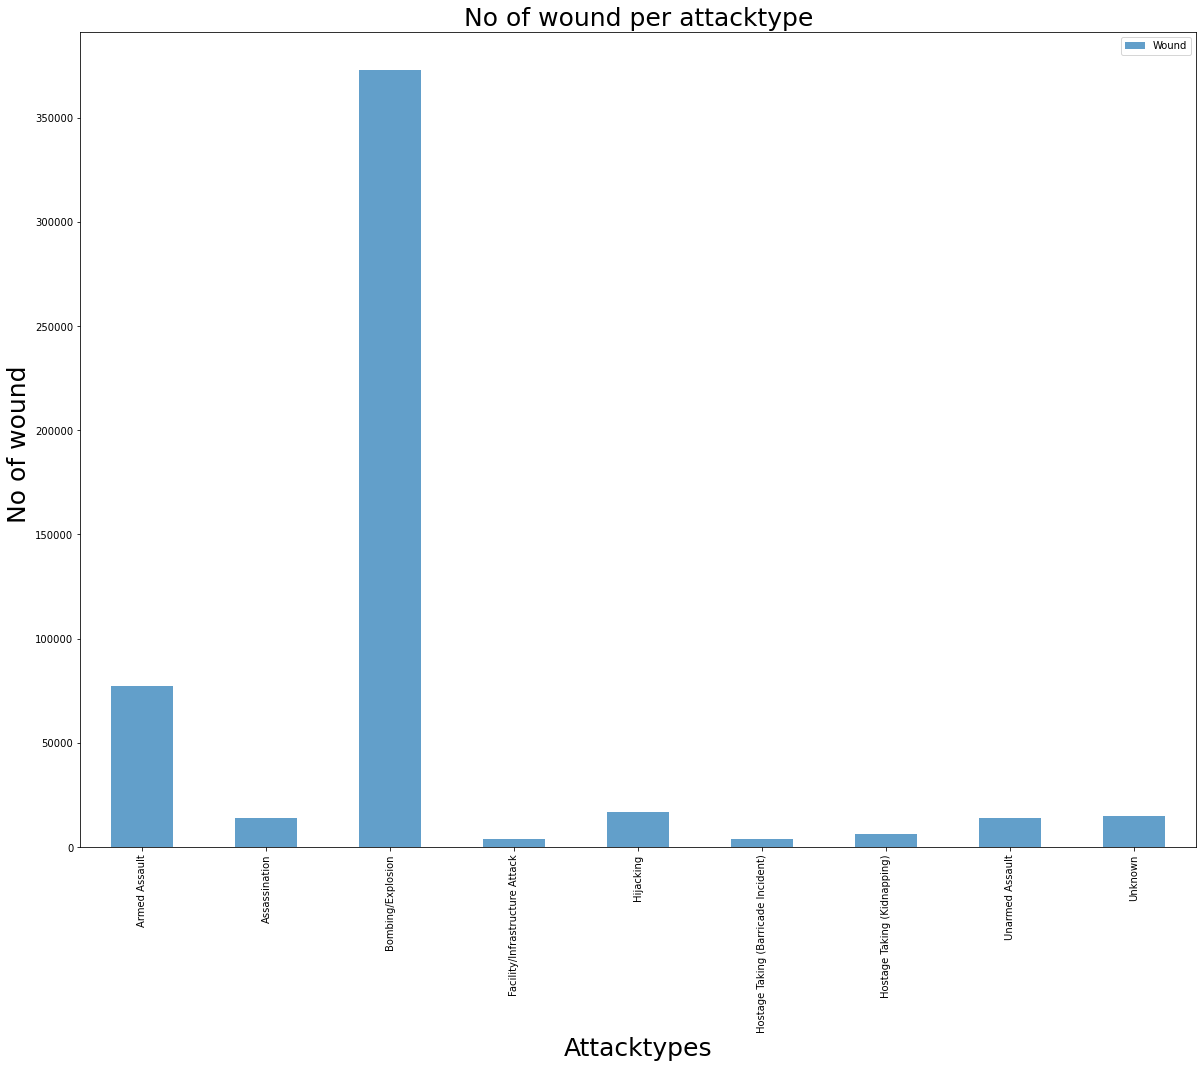

In [27]:
graph=df[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
graph.plot(kind='bar',alpha=0.7,ax=ax4,figsize=(20,15))
plt.xlabel("Attacktypes",fontsize=25)
plt.ylabel("No of wound ",fontsize=25)
plt.title("No of wound per attacktype",fontsize=25)
plt.show()

In [28]:
df['Group']

0                                             MANO-D
1                 23rd of September Communist League
2                                            Unknown
3                                            Unknown
4                                            Unknown
                             ...                    
181686                                    Al-Shabaab
181687                             Muslim extremists
181688    Bangsamoro Islamic Freedom Movement (BIFM)
181689                                       Unknown
181690                                       Unknown
Name: Group, Length: 181691, dtype: object

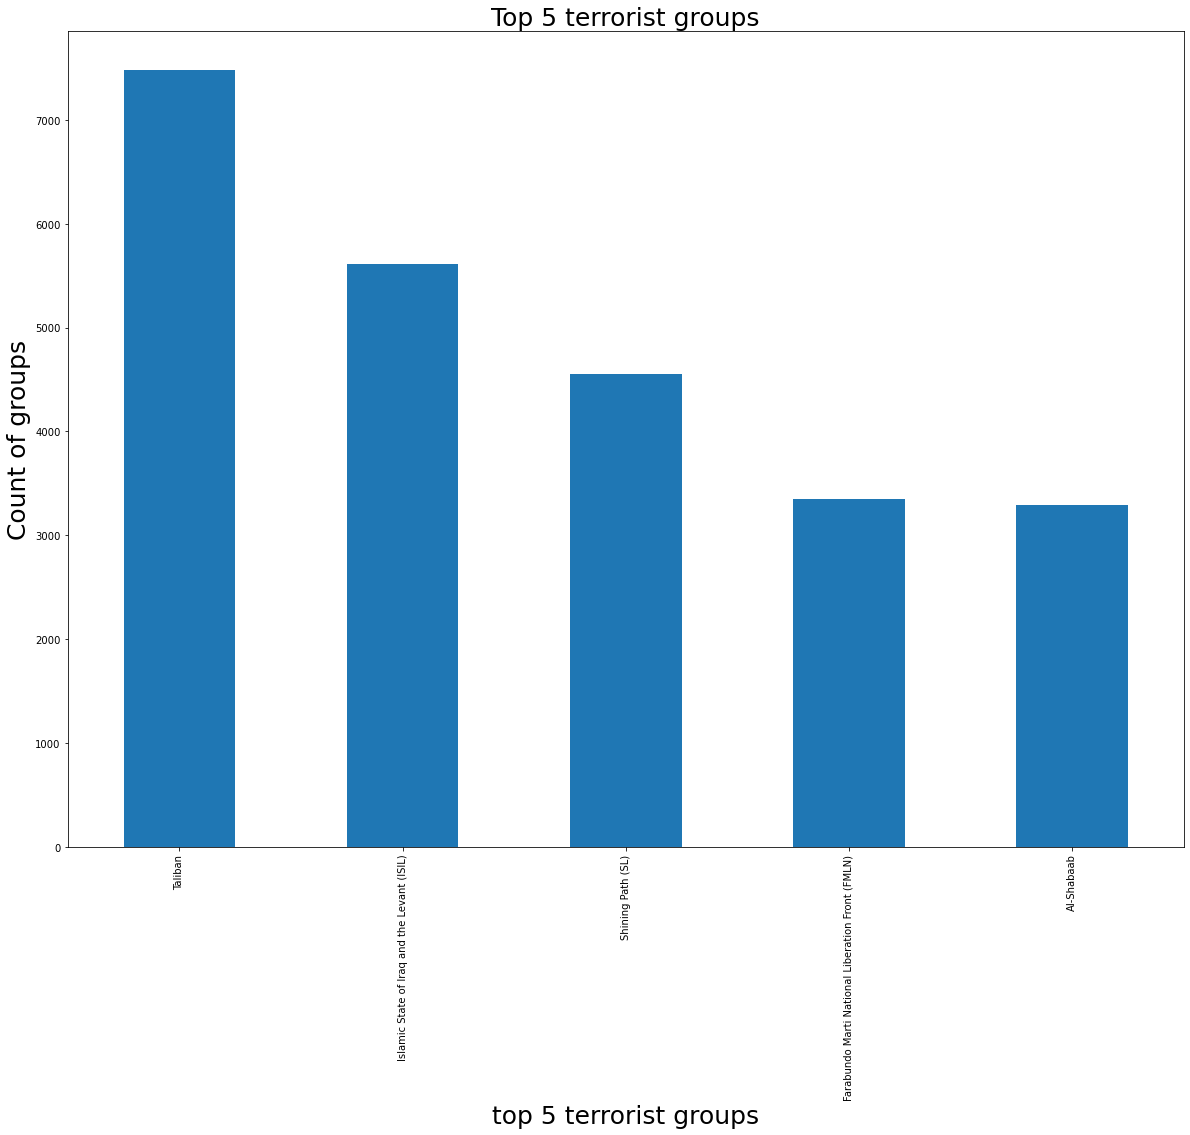

In [29]:
graph = df['Group'].value_counts().drop('Unknown').head(5)
graph.plot(kind='bar',figsize=(20,15))
plt.xlabel("top 5 terrorist groups",fontsize=25)
plt.ylabel("Count of groups",fontsize=25)
plt.title("Top 5 terrorist groups",fontsize=25)
plt.show()

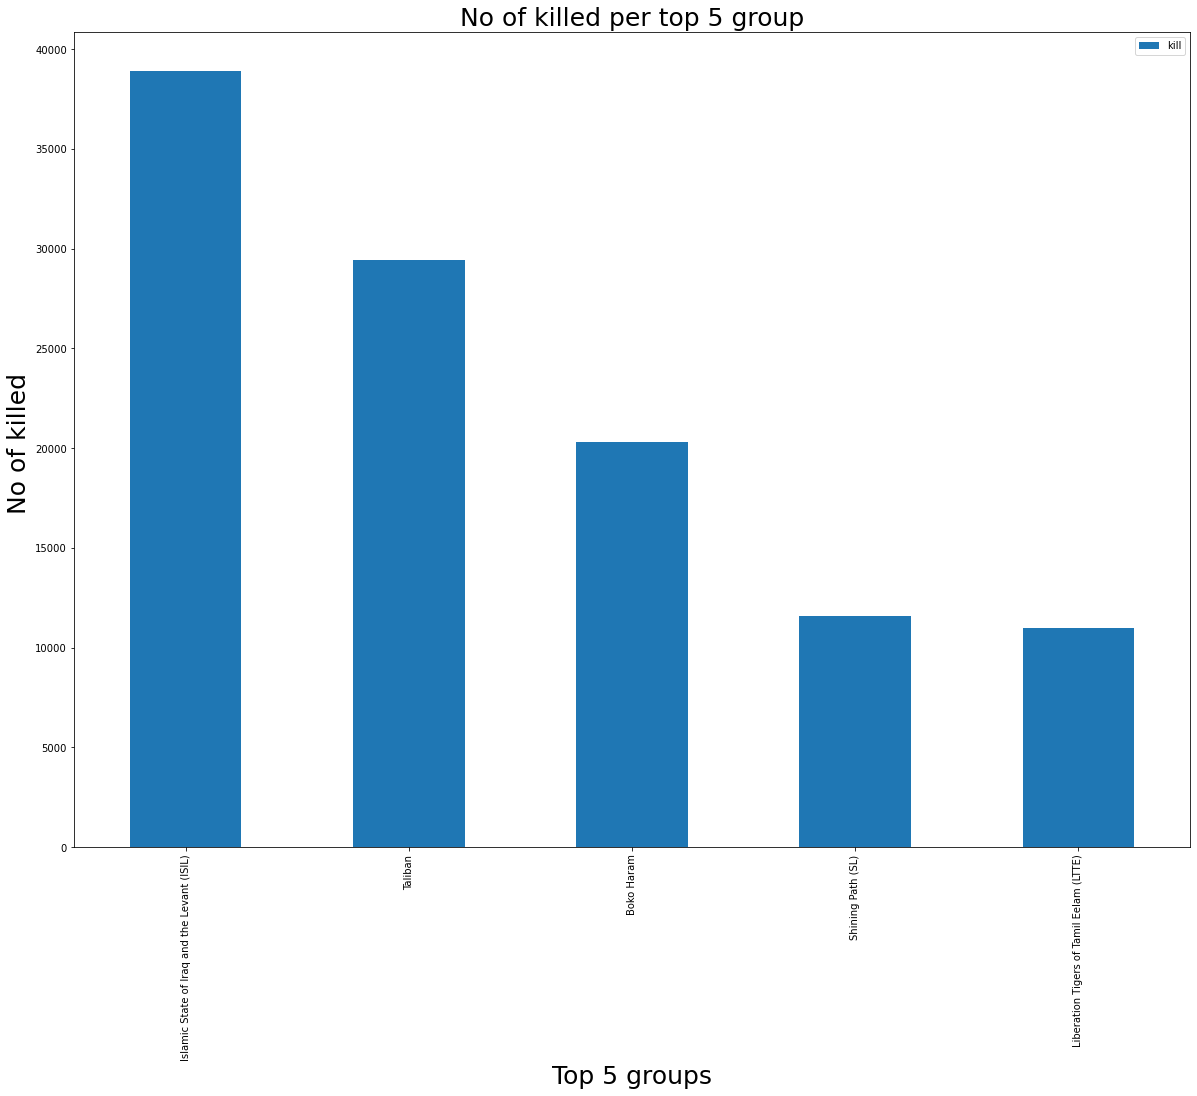

In [30]:
graph = df[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(5)
graph.plot(kind='bar',figsize=(20,15))
plt.xlabel("Top 5 groups",fontsize=25)
plt.ylabel("No of killed ",fontsize=25)
plt.title("No of killed per top 5 group",fontsize=25)
plt.show()

In [31]:
df1=df[['Group','Country','kill']]
df1=df1.groupby(['Group','Country'],axis=0).sum().sort_values("kill",ascending=False).drop('Unknown').reset_index().head(10)
df1

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [32]:
kill = df.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 411868


In [33]:
typeKill = df.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [34]:
countryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


# Final Analysis